In [1]:
%matplotlib widget

import pickle
from IPython import display
from base64 import b64decode
from pacti.terms.polyhedra import *
from pacti.utils import read_contracts_from_file
from contract_utils import *
import numpy as np
from matplotlib.figure import Figure
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

tuple2float = tuple[float, float]

from generators import *
from plot_utils import *

In [2]:
f5 = open("data/results5.data", "rb")
results5 = pickle.load(f5)
f5.close()


In [3]:
# dsn_cons=ranges[0],
# chrg_gen=ranges[1],
# sbo_cons=ranges[2],
# tcmh_cons=ranges[3],
# tcmdv_cons=ranges[4]
# dsn_speed=ranges[5]
# sbo_gen=ranges[6]
# dsn_noise=ranges[7],
# chrg_noise=ranges[8],
# sbo_imp=ranges[9],
# tcm_dv_noise=ranges[10],
# tcm_dv_progress=ranges[11],


def plot_results5(index: int, var: str) -> Figure:
    ranges = results5[index][0]
    dsn_cons = ranges[0]
    chrg_gen = ranges[1]
    sbo_cons = ranges[2]
    tcmh_cons = ranges[3]
    tcmdv_cons = ranges[4]
    dsn_speed = ranges[5]
    sbo_gen = ranges[6]
    dsn_noise = ranges[7]
    chrg_noise = ranges[8]
    sbo_imp = ranges[9]
    tcm_dv_noise = ranges[10]
    tcm_dv_progress = ranges[11]

    op_reqs = results5[index][1]
    min_soc = results5[index][4]
    max_soc = results5[index][5]
    u_bounds = results5[index][6]
    r_bounds = results5[index][7]
    c_bounds = results5[index][8]

    text = f"""dsn_cons=[{dsn_cons}]\nchrg_gen=[{chrg_gen}]\nsbo_cons=[{sbo_cons}]\ntcmh_cons=[{tcmh_cons}]\ntcmdv_cons[{tcmdv_cons}]\ndsn_speed=[{dsn_speed}]"""
    scenario_op = results5[index][2].merge(results5[index][3])
    bounds = [scenario_op.get_variable_bounds(f"{var}1_entry")]
    labels = ["initial"]
    n = 5
    for i in range(1, n):
        bounds += [scenario_op.get_variable_bounds(f"output_{var}{i}")]
        labels += [f"{i}"]
    bounds += [scenario_op.get_variable_bounds(f"output_{var}{n}")]
    labels += [f"final"]
    return plot_steps(bounds, labels, ylabel=var, title=f"Possible values of {var} over the sequence", text=text)


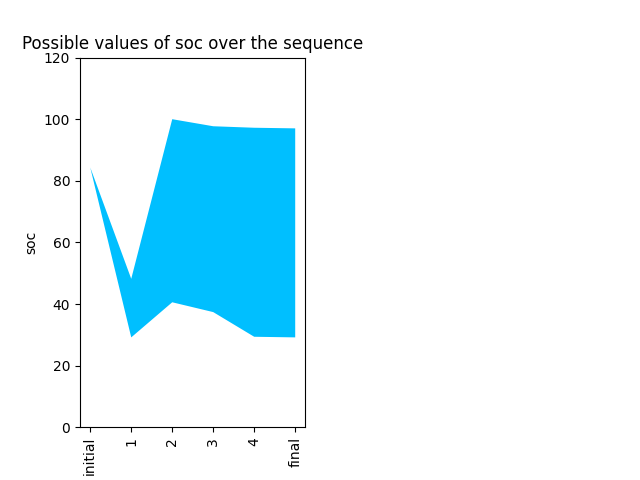

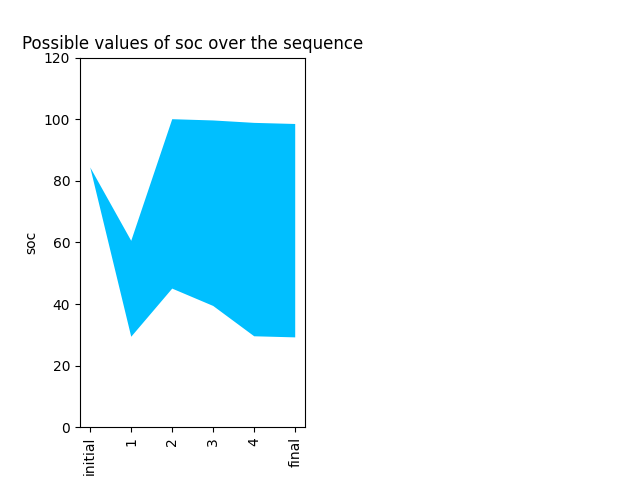

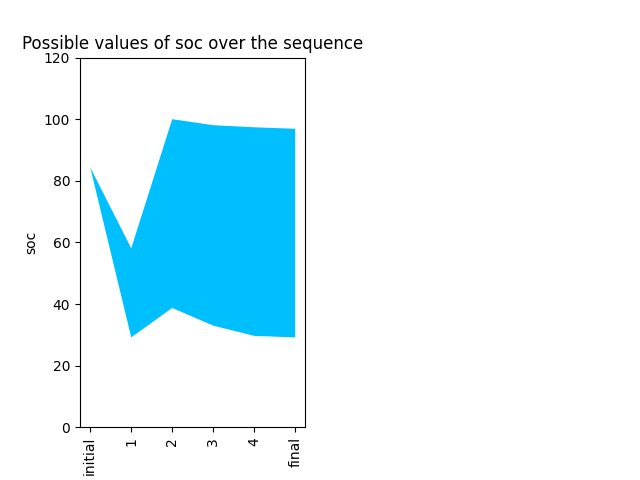

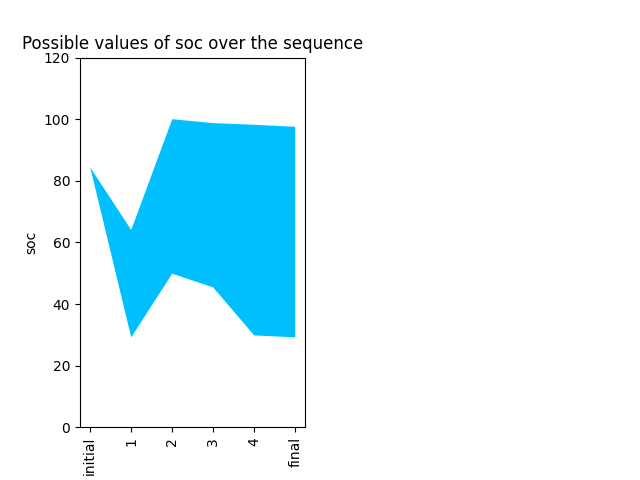

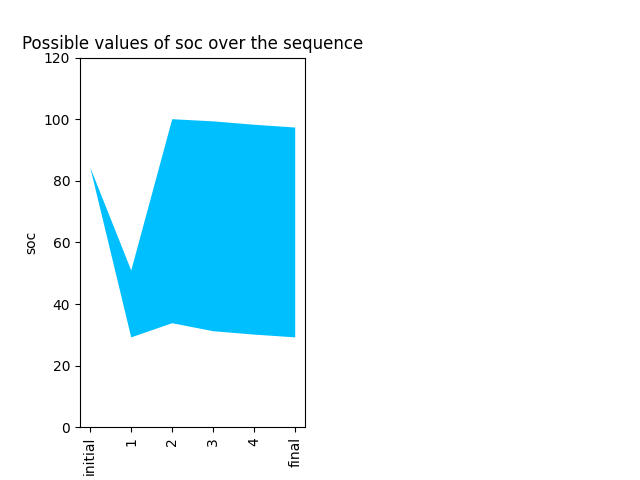

In [4]:
for i in range(0, len(results5)):
    pp = PdfPages(f"figures/results5-{i}-soc.pdf")
    fig = plot_results5(index=i, var="soc")
    pp.savefig()
    pp.close()


In [5]:
results5[0]


([(1.580689471746537, 2.805829548221546),
  (1.8081114967593028, 7.003881617649981),
  (0.3631701213148104, 0.39124619937505334),
  (0.07728035830713317, 0.3985353008957573),
  (0.031716849049742035, 0.22076944360643114),
  (1.945256229698812, 9.330190482620887),
  (5.490334157255749, 7.578875410953568),
  (0.32762722349041584, 1.7068742905667238),
  (0.5068350447140555, 1.693276196279146),
  (0.18792331289633257, 1.2747871680032303),
  (0.763704157593631, 1.6645626565880194),
  (0.1544063250682816, 0.8211729662710725)],
 array([84.34749804, 29.16093121,  6.30378514, 96.74434355, 86.78946386]),
 <Var InVars: [soc1_entry, duration_dsn1, duration_charging2, duration_sbo3, duration_tcm_h4, duration_tcm_dv5, d1_entry, c1_entry, u1_entry, r1_entry]
 OutVars:[output_soc1, output_soc2, output_soc3, output_soc4, output_soc5, output_d1, output_c1, output_d2, output_c2, output_d3, output_c3, output_d4, output_c4, output_d5, output_c5, output_u1, output_r1, output_u2, output_r2, output_u3, output